In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

import sys
sys.path.append("../")

# Fitting a Circle with the Yang Method

The following code defines a p-space in which a new individual can enter a face formation or **F-formation**, according to Yang *et al.* in a 2017 paper:


```
@INPROCEEDINGS{8206105,  
  author={S. {Yang} and E. {Gamborino} and C. {Yang} and L. {Fu}},  
  booktitle={2017 IEEE/RSJ International Conference on Intelligent Robots and Systems (IROS)},   
  title={A study on the social acceptance of a robot in a multi-human interaction using an F-formation based motion model},   
  year={2017},  
  volume={},  
  number={},  
  pages={2766-2771},  
  doi={10.1109/IROS.2017.8206105}}
```

center (0.0009285846417946461, 0.6810734992088915)
radius 0.8906218769548836
[-0.806  1.058  5.846]
[ 5.75e-01 -1.00e-03  2.27e+00]
[-0.575  0.001  0.868]


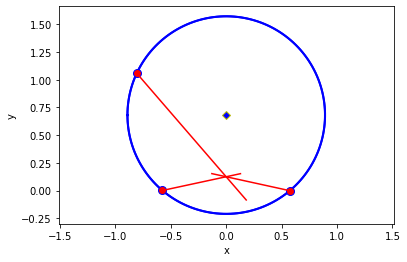

center (0.12742369070086376, 0.1425822677886206)
radius 1.3199595067568322
[-1.179  0.333  6.138]
[-0.931 -0.647  0.641]
[ 1.032 -0.819  2.326]
[-0.628  1.225  5.322]
[0.472 1.417 4.448]
[ 0.055 -1.176  1.516]


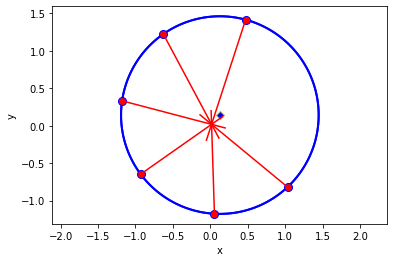

In [2]:
from genff.yang_method.fit_circle import fit_circle_individual, fit_circle_pair, fit_circle_multiple
import numpy as np

# using the same plotting examples as in the rule_based_generative_model notebook
def plot_data_and_circle(D, center, radius, radius2=None):
    
    print("center", center)
    print("radius", radius)
    
    f = plt.figure( facecolor='white')  #figsize=(7, 5.4), dpi=72,
    plt.axis('equal')

    # circle
    theta_fit = np.linspace(-np.pi, np.pi, 180)
    x_fit1 = center[0] + radius*np.cos(theta_fit)
    y_fit1 = center[1] + radius*np.sin(theta_fit)
    plt.plot(x_fit1, y_fit1, 'b-' , label="fit", lw=2)
    
    # circle2, if there is another radius
    if radius2:
        x_fit2 = center[0] + radius2*np.cos(theta_fit)
        y_fit2 = center[1] + radius2*np.sin(theta_fit)
        plt.plot(x_fit2, y_fit2, 'b-' , label="fit", lw=2)
    
    # center
    plt.plot([center[0]], [center[1]], 'bD', mec='y', mew=1)
    
    # data
    for person in D:
        print(person)
        # plot the point and a small amount in the direction of their view
        face_length = .2
        theta = person[2]
        
        plt.plot(person[0], person[1], 'ro', label='data', ms=8, mec='b', mew=1)
        plt.plot([person[0], face_length*(np.cos(theta))], 
                 [person[1], face_length*(np.sin(theta))],
                 'r-', label='data', ms=8, mec='b', mew=1)
        plt.xlabel('x')
        plt.ylabel('y')

    plt.show()
    
# example 1: small circle
points = [[-0.806, 1.058, 5.846],
          [0.575, -0.001, 2.270],
          [-0.575, 0.001, 0.868]]
points = np.array(points)
(center, inner_radius, outer_radius) = fit_circle_multiple(points)
plot_data_and_circle(points, center, inner_radius, outer_radius)

# example 2: 6 people
points = [[-1.179, 0.333, 6.138],
          [-0.931, -0.647, 0.641],
          [1.032, -0.819, 2.326],
          [-0.628, 1.225, 5.322],
          [0.472, 1.417, 4.448],
          [0.055, -1.176, 1.516]]
points = np.array(points)
(center, inner_radius, outer_radius) = fit_circle_multiple(points)
plot_data_and_circle(points, center, inner_radius, outer_radius)
# # example 2: points in a line
# points = [[0.0, 0.0],
#           [1.0, 0.0],
#           [2.0, 0.0]]
# points = np.array(points).T
# (center, radius), residuals = fit_circle_multiple(points)
# print("residual", residuals)
# plot_data_and_circle(points, center, radius)

# # example 3: points slightly off a line
# points = [[0.0, 0.0],
#           [1.0, 0.0],
#           [2.0, 0.1]]
# points = np.array(points).T
# (center, radius), residuals = fit_circle_multiple(points)
# print("residual", residuals)
# plot_data_and_circle(points, center, radius)

# # example 4: points slightly off a line
# points = [[0.0, -1.0],
#           [1.0, 0.0],
#           [0.1, 2.1],
#           [-1.5, 0.3]]
# points = np.array(points).T
# (center, radius), residuals = fit_circle_multiple(points)
# print("residual", residuals)
# plot_data_and_circle(points, center, radius)


# Determining the entry point

Once the center of the F-formation and the boundaries of the p-space have been calculated, the largest remaining gap between two existing members is a good entry zone. The optimal entry point within this zone is found by bisecting the space between the immediate left and right neighbors. The angle between these two existing group members $j$ and $k$ can be determined by the law of cosines:

$\theta_{j,k} = \arccos(\frac{R_j^2 + R_k^2 - d_{j,k}^2}{2R_jR_k})$ 

The bisection of this angle $\theta_{j,k}$ can be used with $R_{a}$, the distance to the center of the o-space, to determine the Cartesian coordinates of the new individual.
For $R_{a}$ , the distance of the agent to the center of the o-space, we use the mean of the inner and outer p-space boundaries.


center (0.0009285846417946461, 0.6810734992088915)
radius 0.8906218769548836
[-0.806  1.058  5.846]
[ 5.75e-01 -1.00e-03  2.27e+00]
[-0.575  0.001  0.868]
[0.54307777 1.38822896 4.05830923]


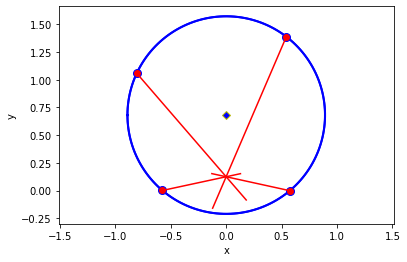

center (0.12742369070086376, 0.1425822677886206)
radius 1.3199595067568322
[-1.179  0.333  6.138]
[-0.931 -0.647  0.641]
[ 1.032 -0.819  2.326]
[-0.628  1.225  5.322]
[0.472 1.417 4.448]
[ 0.055 -1.176  1.516]
[1.40813427 0.46332992 3.38699016]


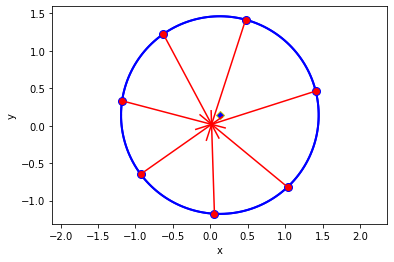

In [3]:
from genff.yang_method.yang_method import yang_generator, test_circle_fit
import math


points = [[-0.806, 1.058, 5.846],
          [0.575, -0.001, 2.270],
          [-0.575, 0.001, 0.868]]
points = np.array(points)
center, inner_radius, outer_radius = test_circle_fit(points)
pred_individual = yang_generator(points)
points = np.append(points, pred_individual, axis=0)
plot_data_and_circle(points, center, inner_radius, outer_radius)

# example 2: 6 people
points = [[-1.179, 0.333, 6.138],
          [-0.931, -0.647, 0.641],
          [1.032, -0.819, 2.326],
          [-0.628, 1.225, 5.322],
          [0.472, 1.417, 4.448],
          [0.055, -1.176, 1.516]]
points = np.array(points)
center, inner_radius, outer_radius = test_circle_fit(points)
pred_individual = yang_generator(points)
points = np.append(points, pred_individual, axis=0)
plot_data_and_circle(points, center, inner_radius, outer_radius)

center (0.0, 0.0)
radius 1.0
[1. 0. 0.]
[-1.          0.          3.14159265]
[6.12323400e-17 1.00000000e+00 4.71238898e+00]


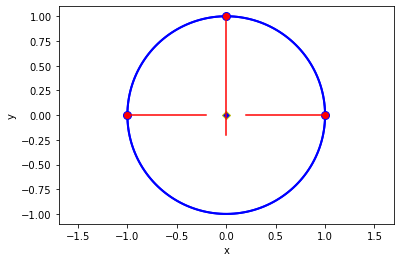

center (-0.9887840382022619, 1.6690640212577903)
radius 0.72
[-0.78   0.98   1.865]
[-1.19756808  2.35812804  5.00659265]


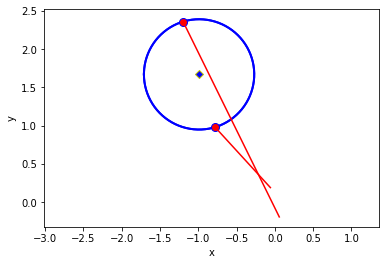

In [4]:
# validate vis-a-vis points
points = np.array([[1,0,0],[-1,0,math.pi]])
center, inner_radius, outer_radius = test_circle_fit(points)
pred_individual = yang_generator(points)
points = np.append(points, pred_individual, axis=0)
plot_data_and_circle(points, center, inner_radius, outer_radius)

# validate single individual
points = np.array([[-0.78,0.98,1.865]])
center, inner_radius, outer_radius = test_circle_fit(points)
pred_individual = yang_generator(points)
points = np.append(points, pred_individual, axis=0)
plot_data_and_circle(points, center, inner_radius, outer_radius)

# Evaluation
Ideally, the evaluation would be as drop-in as possible with the optimization / rule-based model.


## Simulated Data
First, let's see how the method proposed by Yang *et al.* performs on simulated data in an iGibson environment.

In [5]:
from genff.data_handling.dataset import GroupDataset

data = GroupDataset("../data/igibson_sim_data/env_Merom_0_int.h5", # generate this sample data with example_make_sim_data_igibson.ipynb
                    rect_repr=False)       # note that this data is already centered so no need to translate it
print("Loaded {} examples".format(len(data)))

Loading ../data/igibson_sim_data/env_Merom_0_int.h5
Loaded 1202 examples


In [6]:
from genff.opt_method.opt_generator import torch_to_numpy, opt_generator_loss
from genff.visualization.plotting import plot_sample

# WARNING: copied from notebooks/rule_based_generative_model.ipynb
def compute_loss_for_plotting(loss, min_x=-5.0, max_x=5.0, min_y=-5.0, max_y=5.0):
    X = np.arange(min_x, max_x, 0.1)
    Y = np.arange(min_y, max_y, 0.1)
    X, Y = np.meshgrid(X, Y)
    Z = np.zeros_like(X)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i,j] = loss((X[i,j], Y[i,j]))
    return X, Y, Z


def plot_yang_result(pred_individual, loss, individual, context, mask, env):

    context_filtered = context[mask.bool(),:]
    center = np.mean(context_filtered.numpy(), axis=0)
    X, Y, Z = compute_loss_for_plotting(loss,
                                        center[0] - 3, center[0] + 3,
                                        center[1] - 3, center[1] + 3)
    
    fig, ax = plt.subplots(1,1,sharey=True)
    ax.contourf(X, Y, Z, levels=100)
    ax.autoscale(True)
    ax.margins(0.6)
    q1 = ax.quiver(context_filtered[:,0],context_filtered[:,1],
                   np.cos(context_filtered[:,2]), np.sin(context_filtered[:,2]),
                   color="r", label="context")
    
    ax.quiver(individual[0,0],individual[0,1],
              np.cos(individual[0,2]), np.sin(individual[0,2]), 
              linewidths=1, edgecolors='w', color="w", label="true ind")
    
    ax.quiver(pred_individual[:, 0], pred_individual[:, 1],
              np.cos(pred_individual[:, 2]), np.sin(pred_individual[:, 2]), 
              color="g", label="pred ind")

    ax.legend(loc='lower right')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_aspect('equal')
    
    plt.show()

    
def test_yang_generator(dataset, idx, with_env=False):
    individual_t, context_t, mask_t, env_t = dataset[idx]

    if with_env:
        plot_sample(individual_t, context_t, mask_t, env_t, dataset.resolution, mode='all')
        plt.show()

    # convert tensors to numpy arrays
    individual = torch_to_numpy(individual_t)
    context = torch_to_numpy(context_t)
    mask = torch_to_numpy(mask_t)
    env = torch_to_numpy(env_t)
    
    # apply mask to context
    context_filtered = context[mask > 0, :]

    pred_individual = yang_generator(context_filtered)
    loss, params = opt_generator_loss(context_filtered, env, env_res = dataset.resolution,
                                      weight_psloss=0.5, weight_closs=0.2, weight_eloss=0.0, verbose=False)
    plot_yang_result(pred_individual, loss, individual_t, context_t, mask_t, env_t)

Simulated dataset sample  0


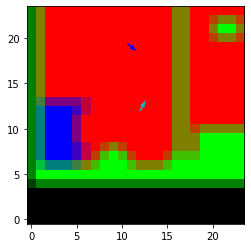

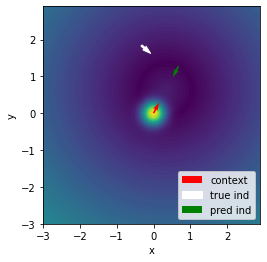

Simulated dataset sample  100


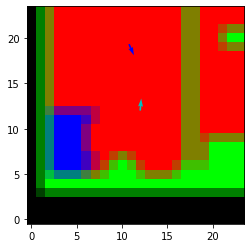

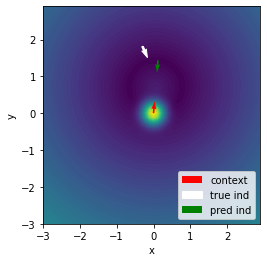

Simulated dataset sample  200


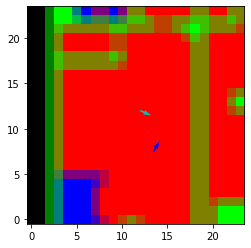

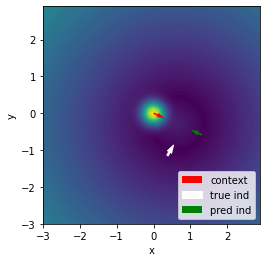

Simulated dataset sample  300


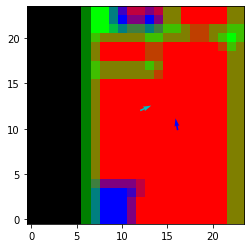

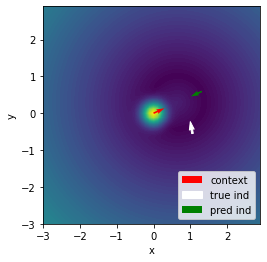

Simulated dataset sample  400


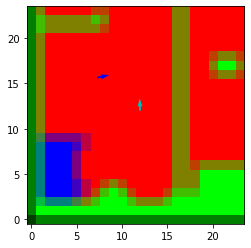

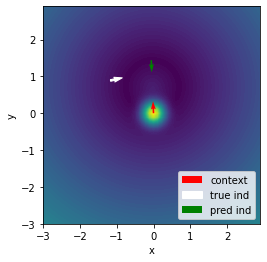

Simulated dataset sample  500


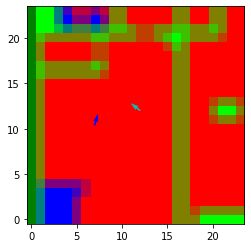

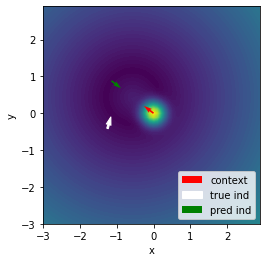

Simulated dataset sample  600


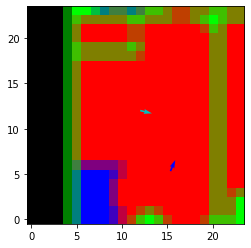

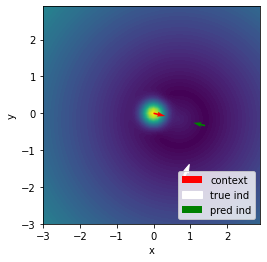

Simulated dataset sample  700


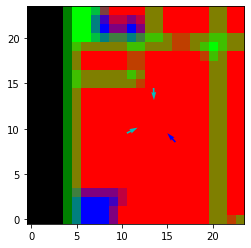

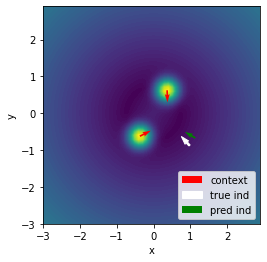

Simulated dataset sample  800


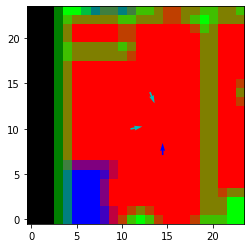

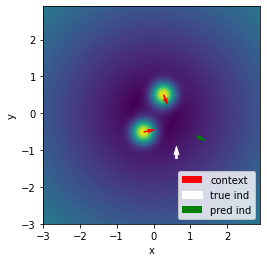

Simulated dataset sample  900


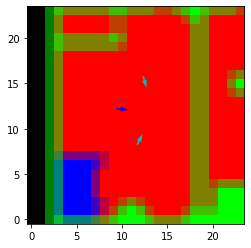

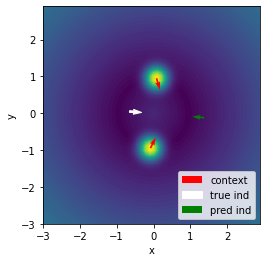

Simulated dataset sample  1000


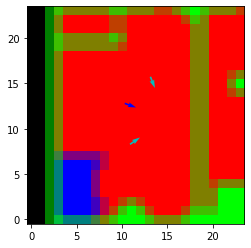

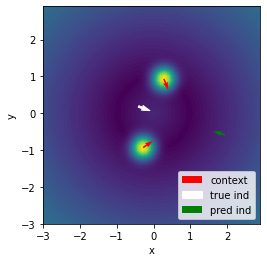

Simulated dataset sample  1100


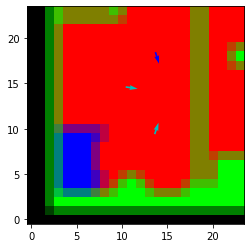

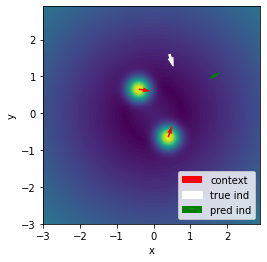

Simulated dataset sample  1200


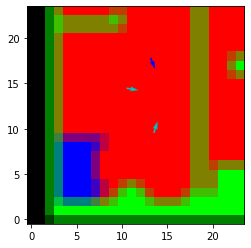

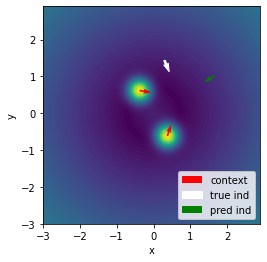

In [7]:
%matplotlib inline

for i in range(0, len(data), 100):
    print("Simulated dataset sample ", i)
    test_yang_generator(data, i, with_env=True)

## Cocktail Party Dataset
Next, let's see how the method performs on the cocktail party dataset and environment. The data below
was generated with `bin/make_cocktail_data.py`. For example:

```bash
$ cd ../bin
$ ./make_cocktail_data.py --groups-file ../data/cocktail_party/groups_test.txt --features-file ../data/cocktail_party/features.txt --output-file ../data/cocktail_party/cp_test.h5 --env-file ../data/cocktail_party/env_cocktail_party.txt

```

In [8]:
cocktail_data = GroupDataset("../data/cocktail_party/cocktail_party_train.h5", rect_repr=False)
print("Loaded {} examples".format(len(cocktail_data)))

Loading ../data/cocktail_party/cocktail_party_train.h5
Loaded 1394 examples


Cocktail party dataset sample  0


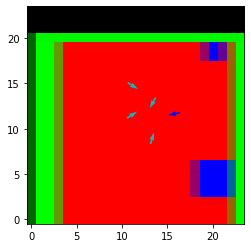

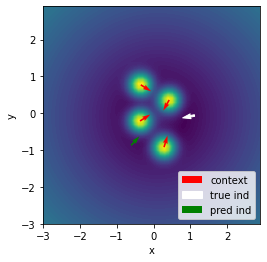

Cocktail party dataset sample  1


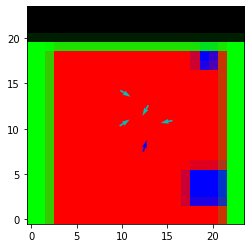

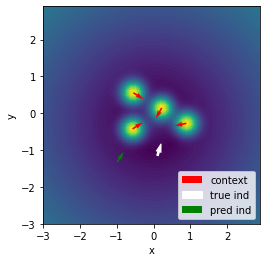

Cocktail party dataset sample  2


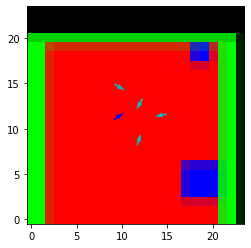

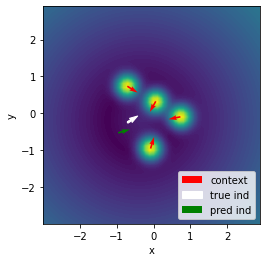

Cocktail party dataset sample  3


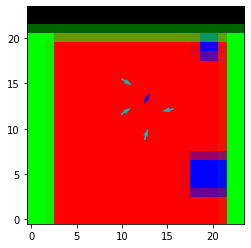

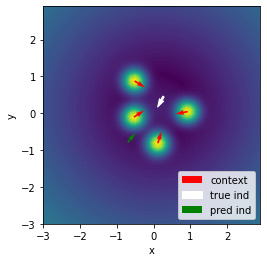

Cocktail party dataset sample  4


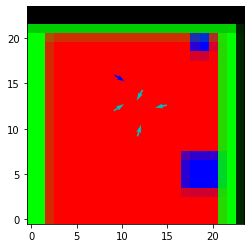

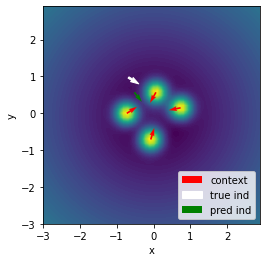

Cocktail party dataset sample  5


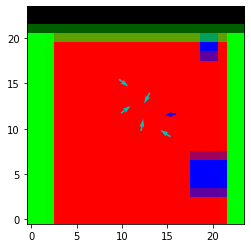

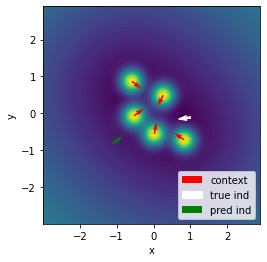

Cocktail party dataset sample  6


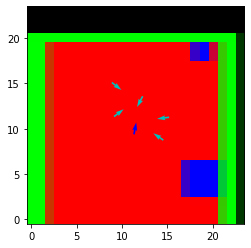

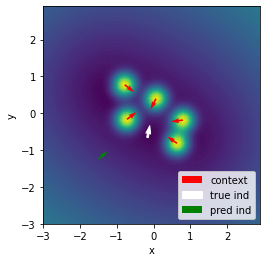

Cocktail party dataset sample  7


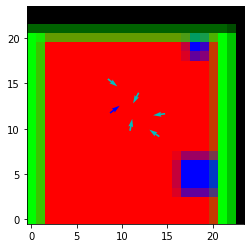

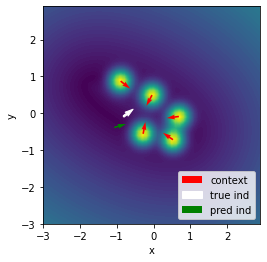

Cocktail party dataset sample  8


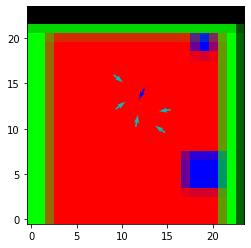

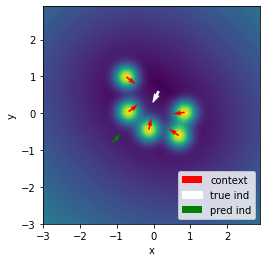

Cocktail party dataset sample  9


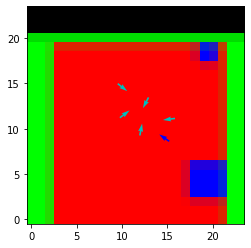

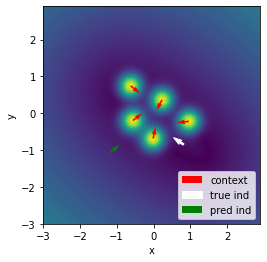

Cocktail party dataset sample  10


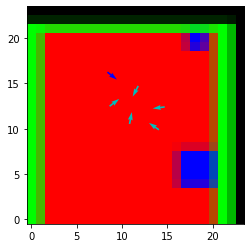

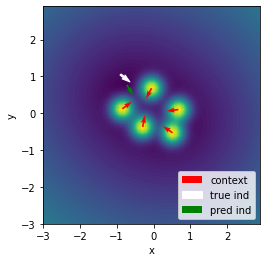

Cocktail party dataset sample  11


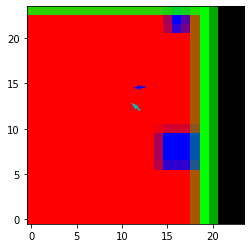

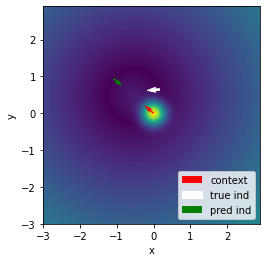

Cocktail party dataset sample  12


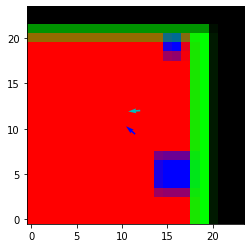

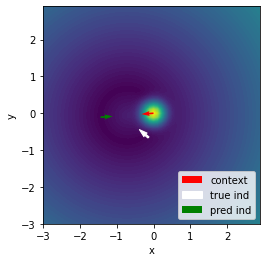

Cocktail party dataset sample  13


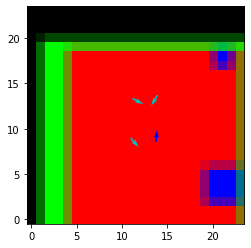

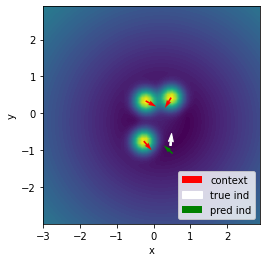

Cocktail party dataset sample  14


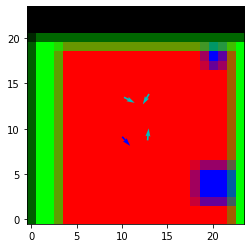

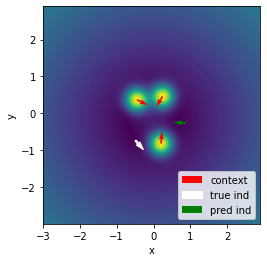

Cocktail party dataset sample  15


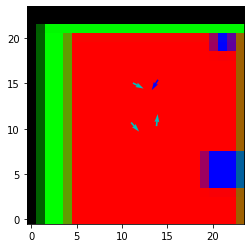

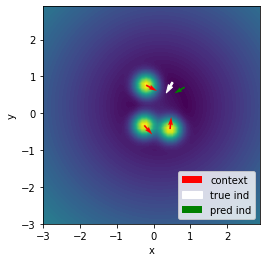

Cocktail party dataset sample  16


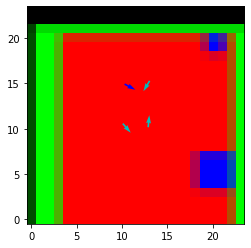

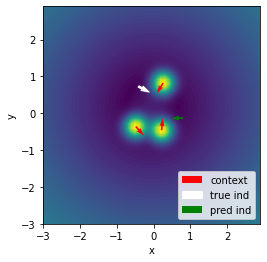

Cocktail party dataset sample  17


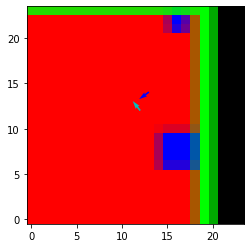

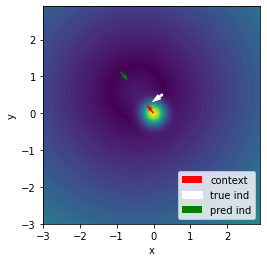

Cocktail party dataset sample  18


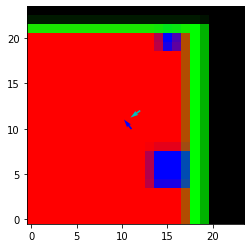

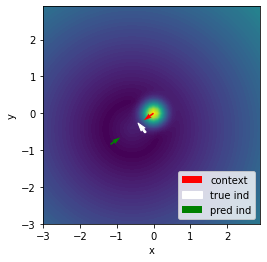

Cocktail party dataset sample  19


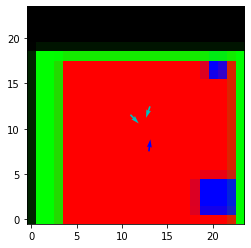

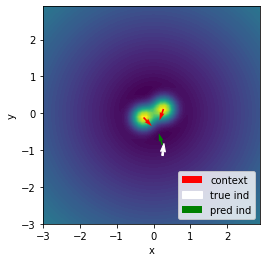

In [9]:
for i in range(20):
    print("Cocktail party dataset sample ", i)
    test_yang_generator(cocktail_data, i, with_env=True)

## Outlier Yang method result

When the orientations of two individuals have very similar cosine values, the radius of their pairwise circle is anomolously long. The result distorts the o-space center and affects the position of the predicted individual. Some samples from the cocktail party dataset demonstrate this distortion.

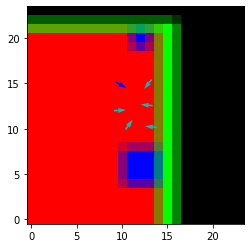

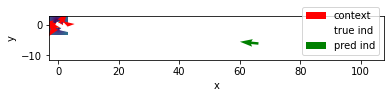

In [10]:
test_yang_generator(cocktail_data, 997, with_env=True)

In [11]:
# investigating cocktail party samples with very long radii
individual, context, mask, env = cocktail_data[997]

# weird result
print(context)
pair_center, pair_radius = fit_circle_pair(context[3], context[4])
print(f"Individual A: {context[0]}, Individual B: {context[2]}")
print(f"Pair center: {pair_center}, radius: {pair_radius}\n")

# apply yang generator method
pred_individual = yang_generator(context, mask)
print(f"Prediction: {pred_individual}")

tensor([[-4.0400e-01, -5.2400e-01,  9.4800e-01],
        [ 3.1600e-01,  8.5600e-01,  4.0380e+00],
        [-7.2400e-01, -4.0000e-03,  6.0000e-02],
        [ 4.6600e-01, -4.6400e-01,  3.0490e+00],
        [ 3.4600e-01,  1.3600e-01,  3.0530e+00]])
Individual A: tensor([-0.4040, -0.5240,  0.9480]), Individual B: tensor([-0.7240, -0.0040,  0.0600])
Pair center: (tensor(330.6656), tensor(-31.1257)), radius: -331.6201477050781

Prediction: [[66.16804409 -6.08285867  9.33058443]]


## Outputting metrics
Finally, let's extract some metrics for evaluation.

In [13]:
import os
from IPython.display import display, HTML
from genff.eval.eval_helpers import compute_results, create_metrics_dict
from genff.eval.gen_fun import gen_yang


output_dir = "yang_eval"
if not os.path.isdir(output_dir):
    os.mkdir(output_dir)

In [14]:
# starting with simulated data
metrics = create_metrics_dict()
simul_df = compute_results(gen_yang, data, "Yang", metrics, draw_result=False, output_folder=output_dir, metadata={}, verbose=False)
display(HTML(simul_df.to_html()))

In [15]:
# now with cocktail party data
metrics = create_metrics_dict()
cocktail_df = compute_results(gen_yang, cocktail_data, "Yang", metrics, draw_result=False, output_folder=output_dir, metadata={}, verbose=False)
display(HTML(cocktail_df.to_html()))

../genff/opt_method/opt_generator.py:110: UserWarning: Failed to fit ellipse. Fitting circle instead. Error: The fitted ellipse has a major semi-axis of 5.567749885830284 units (>5), but this is not likely for group conversations. The fitting must have given a bad result!
  warnings.warn('Failed to fit ellipse. Fitting circle instead. Error: {}'.format(e))
../genff/opt_method/opt_generator.py:110: UserWarning: Failed to fit ellipse. Fitting circle instead. Error: The fitted ellipse has a major semi-axis of 12.329015747110345 units (>5), but this is not likely for group conversations. The fitting must have given a bad result!
  warnings.warn('Failed to fit ellipse. Fitting circle instead. Error: {}'.format(e))
../genff/opt_method/opt_generator.py:110: UserWarning: Failed to fit ellipse. Fitting circle instead. Error: The fitted ellipse has a major semi-axis of 6.661003166255432 units (>5), but this is not likely for group conversations. The fitting must have given a bad result!
  warnin